# Dealing with Categorical Inputs

$$ f({\bf x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p $$

In order for linear regression to make sense, the $x_j$s all have to be quantitative. But what if we want to incorporate categorical variables in our linear regression model? Like we did with textual data, we have to convert the categorical variables into quantitative variables.

Let's start with the easy case first: a binary categorical variable (i.e., a categorical variable with two levels).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("/data/harris.csv")

## Binary Categorical Variables

A binary categorical variable (like `Sex` in the Harris Bank data) has an obvious encoding as a quantitative variable; we can represent one level by 1 and the other by 0. Variables that are either 0 or 1 are also called **indicator variables** or **dummy variables**.

Encode the categorical variable `Sex` as a dummy variable. Then, fit two linear regression models:

1. a model that predicts `Bsal` from just `Sex`, and
2. a model that predicts `Bsal` from both `Sex` and `Exper`.

In [2]:
# YOUR CODE HERE
import numpy as np

data['BinarySex'] = 1*(data['Sex']=='Male')

Extract the linear regression coefficient from the first model. Interpret the coefficient.

In [3]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model2 = LinearRegression()

In [4]:
model1.fit(data[['BinarySex']], data['Bsal'])
model1.coef_

array([ 818.02254098])

Males are predicted to have a starting salary of $818 higher than females.

In [5]:
model2.fit(data[['BinarySex', 'Exper']], data['Bsal'])
model2.coef_

array([ 814.05324408,    1.22838962])

For a man and a woman with the same leve of experience, we predict a man to make \$814.05 more than a woman

Holing gender constant, each additional month of experience yields an increased predicted salary of \$1.22

In [ ]:
# YOUR CODE HERE

_YOUR INTERPRETATION HERE_

## General Categorical Variables

To encode a general categorical variable, we'll need multiple quantitative variables. For example, suppose we treat `Educ` as a categorical variable with 5 levels (8, 10, 12, 15, 16). We can encode this categorical variable with 4 dummy variables:

- The first variable, $x_1$, is 1 if `Educ == 10` and 0 otherwise.
- The second variable, $x_2$, is 1 if `Educ == 12` and 0 otherwise.
- The third variable, $x_3$, is 1 if `Educ == 15` and 0 otherwise.
- The fourth variable, $x_4$, is 1 if `Educ == 16` and 0 otherwise.

Then, we add all four of these variables to our regression model. Together, these 4 dummy variables represent the single categorical variable `Educ`.

$$ f({\bf x}) = \beta_0 + \underbrace{\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4}_{\tt{Educ}} + ... $$

Notice that we left out one level (`Educ == 8`). This level serves as a baseline. The coefficients of the dummies of the other levels represent the effect of that education level, _relative to 8 years of education_. To see this, let's work out what the predicted salary would be for someone with each level of education:

_COMPLETE THE FOLLOWING STATEMENTS WITH EXPRESSIONS IN TERMS OF $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4$._

- For a person with 8 years of education, their predicted starting salary is: $\beta_0$
- For a person with 10 years of education, their predicted starting salary is: $\beta_0 + \beta_1$ 
- For a person with 12 years of education, their predicted starting salary is: $\beta_0 + \beta_2$
- For a person with 15 years of education, their predicted starting salary is: $\beta_0 + \beta_3$
- For a person with 16 years of education, their predicted starting salary is: $\beta_0 + \beta_4$

In [22]:
# Convert categorical variable to a matrix of dummy variables.
X = pd.get_dummies(data["Educ"])
X = X.drop(8, axis=1)
X.head(3)
# Don't forget to drop one of the levels from X.

,10,12,15,16
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0


**Exercise 1**

- Make a scatterplot of `Bsal` versus `Educ`.
- Fit a linear regression model to predict `Bsal`, where `Educ` is treated as a quantitative variable. Plot the fitted function on the scatterplot.
- Fit a linear regression model to predict `Bsal`, where `Educ` is treated as a categorical variable. Plot the fitted function on the scatterplot.

How do the two models differ?

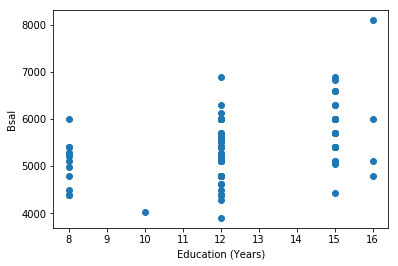

In [33]:
plt.scatter(x=data['Educ'], y=data['Bsal'])
plt.xlabel('Education (Years)')
plt.ylabel('Bsal')

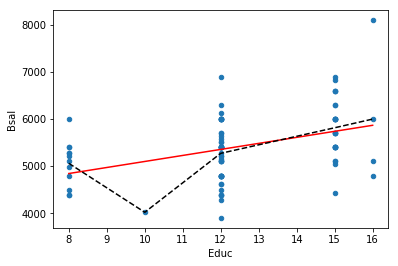

In [44]:
# YOUR CODE HERE
import numpy as np

data.plot.scatter(x='Educ', y='Bsal')

modelQ = LinearRegression()
modelQ.fit(data[['Educ']], data['Bsal'])

X_new = pd.DataFrame({
        'Educ': np.arange(8, 17)
    })

y_new = modelQ.predict(X_new)
plt.plot(X_new, y_new, 'r-')

modelC = LinearRegression()
modelC.fit(X, data['Bsal'])

X_new = pd.get_dummies(pd.Series([8, 10, 12, 15, 16], name='Educ')).drop(8, axis=1)

y_new = modelC.predict(X_new)
plt.plot([8, 10, 12, 15, 16], y_new, 'k--')

**Exercise 2**

Fit a linear regression model to predict `Bsal` from `Exper` (a quantitative variable) and `Educ` (a categorical variable). Predict the starting salary of someone with 3 years of experience and 15 years of education.

_Hint:_ Once you have already fit an encoding `enc`, you can encode subsequent values by calling `enc.transform()`.

In [50]:
# YOUR CODE HERE
X = pd.get_dummies(data['Educ']).drop(8, axis=1)
X['Exper'] = data['Exper']

model = LinearRegression()
model.fit(X, data['Bsal'])

model.predict([[0, 0, 1, 0, 36.0]])

array([ 5729.48787407])